# Assignment 1 - House Prices: Advanced Regression Techniques
MSDS 422: Practical Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

%matplotlib inline
sns.set()

## Import Data

In [2]:
# Create file path to the test and trained data set
train_path = os.path.join(os.getcwd(), 'data', 'train.csv')
test_path = os.path.join(os.getcwd(), 'data', 'test.csv')

# Load csv into pandas df
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Part 1: Descriptive Statistics
Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Part 2: Investigate missing data and outliers.
### First look:

In [7]:
# Create null data frame
nulls_df = df_train.isnull().sum().to_frame('NAs')

# Show all columns with null values
nulls_df = nulls_df.loc[nulls_df['NAs'] != 0]

# Sort by assendind order
nulls_df.sort_values(by=['NAs'], ascending=False)

,NAs
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


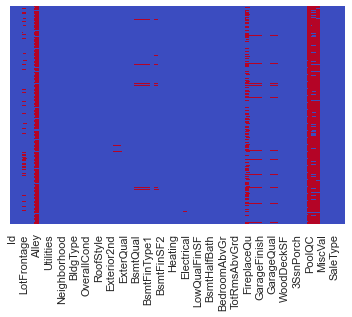

In [8]:
# Heatmap check for nulls
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

### Looking at the ['data_description.txt'](https://github.com/DrakeData/House_Price_EDA/blob/sandbox/data_description.txt) file, there are categorical variables where 'NA' means no feature. 

For these variables, I will fill the 'NAs' with 'None'.

List of categorical variables affected:
- PoolQC
- MiscFeature
- Alley
- Fence
- FireplaceQu
- GarageType 
- GarageFinish
- GarageQual
- GarageCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- MasVnrType

In [9]:
categ_vars_ls = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
                 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

# Clean train set
for var in categ_vars_ls:
    df_train[var].fillna('None', inplace=True)

# Clean test set
for var in categ_vars_ls:
    df_test[var].fillna('None', inplace=True)

### Similar to  categorical variables, there are numeric variables where 'NA' means no feature.

For these variables, I will fill the 'NAs' with '0'.

List of numeric variables affected:
- GarageArea
- GarageCars
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath
- MasVnrArea

In [10]:
num_vars_ls = ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
               'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
               'MasVnrArea']

# Clean train set
for var in num_vars_ls:
    df_train[var].fillna(0, inplace=True)
    
# Clean test set
for var in num_vars_ls:
    df_test[var].fillna(0, inplace=True)

### The remaining NAs will be handled:
- Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, and Utilities 'NAs' will be imputed with their most frequent value (mode).
- LotFrontage 'NAs' will be imputed with its mean per house based on the mean in the neighborhood.
- GarageYrBlt impute with YearBuilt (assuming that the garage is built with the house)

In [11]:
vars_ls1 = ['Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
            'Exterior2nd', 'SaleType', 'Utilities']

imputer = SimpleImputer(strategy='most_frequent')

# Clean train set
df_train[vars_ls1] = pd.DataFrame(imputer.fit_transform(df_train[vars_ls1]), index=df_train.index)

# Clean test set
df_test[vars_ls1] = pd.DataFrame(imputer.fit_transform(df_test[vars_ls1]), index=df_test.index)

In [12]:
train_average_house_neighb = df_train.groupby('Neighborhood')['LotFrontage']
test_average_house_neighb = df_test.groupby('Neighborhood')['LotFrontage']

# Clean train set
df_train['LotFrontage'].fillna(train_average_house_neighb.transform(lambda x: x.fillna(x.mean())), inplace=True)

# Clean test set
df_test['LotFrontage'].fillna(test_average_house_neighb.transform(lambda x: x.fillna(x.mean())), inplace=True)

In [13]:
# Clean train set
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['YearBuilt'])

# Clean test set
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['YearBuilt'])

#### NA Check: Verify that we covered all 'NAs' in our data

In [14]:
print(f'Number of NAs in train df: {sum(df_train.isnull().sum())}')
print(f'Number of NAs in test df: {sum(df_test.isnull().sum())}')

Number of NAs in train df: 0
Number of NAs in test df: 0


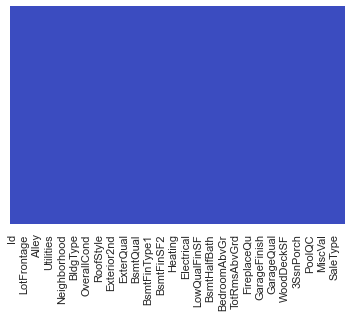

In [15]:
# Heatmap check for nulls
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

## Part 3: Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships

#### Look at the top 5 numerical variable that are highly correlated with SalesPrice

In [16]:
corr_mat = df_train.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(6)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

#### OverallQual and SalePrice

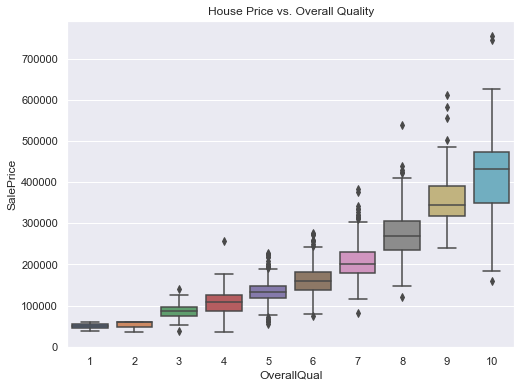

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
title = plt.title('House Price vs. Overall Quality')

#### GrLivArea and SalesPrice

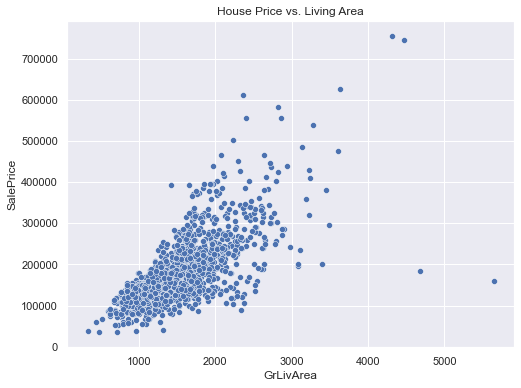

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)
title = plt.title('House Price vs. Living Area')

Looking at the above scatter plot, we can see there are a couple outliers that have a high living area and a low sale price. We would want to remove these outliers as it can affect any future models we decide to use with this data later on.

In [19]:
# Clean train df
outlier = df_train[(df_train.GrLivArea > 4000) & (df_train.SalePrice < 200000)].index
df_train.drop(outlier, axis=0, inplace=True)

### FircepalceQu and SalesPrice
#### Encode the categories to help visualize the corleation to SalesPrice
New encoding values:
- Ex: 5
- Gd: 4
- TA: 3
- Fa: 2
- Po: 1
- None: 0

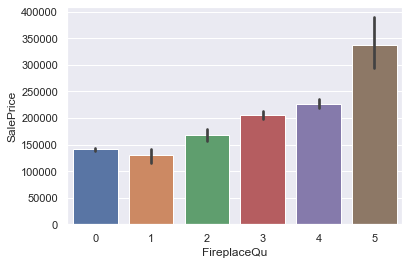

In [20]:
df_train['FireplaceQu'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

sns.set(style="darkgrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=df_train);

## Part 4: Engage in feature creation by splitting, merging, or otherwise generating a new predictor

Here are a couple data points that I feel should be included in the data:
- Total square feet of the house: add square feet on the first floor, second floor, and basement
- Total bathrooms in the house: add all the full and half bathrooms on the first floor and basement
- Age of house: subtract YearBuilt column from YrSold
- Was the house remodeled (Y/N): check to see if YearRemodAdd column equals YearBuilt

#### Total Square Feet Column

In [21]:
# train
df_train['TotalSqft'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

# test
df_test['TotalSqft'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

#### Total Bathrooms Column

In [22]:
# train
df_train['TotalBath'] = df_train['FullBath'] + df_train['BsmtFullBath'] + 0.5*(df_train['HalfBath'] + df_train['BsmtHalfBath'])

# test
df_test['TotalBath'] = df_test['FullBath'] + df_test['BsmtFullBath'] + 0.5*(df_test['HalfBath'] + df_test['BsmtHalfBath'])

#### Age of House

In [23]:
# train
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']

# test
df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']

#### Was the House Remodled (Y/N) Column
- No: 0
- Yes: 1

In [24]:
# train
df_train['ReModeled'] = np.where(df_train['YearRemodAdd'] == df_train['YearBuilt'], 0, 1)

# test
df_test['ReModeled'] = np.where(df_test['YearRemodAdd'] == df_test['YearBuilt'], 0, 1)

#### Check for new columns

In [25]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqft,TotalBath,HouseAge,ReModeled
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,2566,3.5,5,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,2524,2.5,31,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,2706,3.5,7,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,2473,2.0,91,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,3343,3.5,8,0


### Export cleaned data files

In [26]:
# Train data
df_train.to_csv('data/train_clean.csv', index=False)

# Test data
df_test.to_csv('data/test_clean.csv', index=False)

## Part 5: Using the dependent variable, perform both min-max and standard scaling in Python

In [27]:
# variables
x = train_df[['OverallQual', 'GrLivArea', 'FireplaceQu']].values
y = df['SalePrice'].values

NameError: name 'df' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(x[:,0]);
ax.hist(x[:,1]);
ax.hist(x[:,2]);

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax[0].scatter(x[:,0], y);
ax[1].scatter(x[:,1], y);
ax[2].scatter(x[:,2], y);

plt.show()

#### Note: . FireplaceQu (far right graph) was not as strong as I was hoping, in which I will remove it from the standardization.

### MinMaxScaler

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.hist(x_minmax [:,0]);
ax.hist(x_minmax [:,1]);

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.scatter(x_minmax [:,0], y);
ax.scatter(x_minmax [:,1], y);

### StandardScaler

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.hist(x_std[:,0]);
ax.hist(x_std[:,1]);

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.scatter(x_std[:,0], y);
ax.scatter(x_std[:,1], y);